# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

# Business Exploration Questions

# Notebook Preparation

## Importing Modules

In [1]:
import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error

import itertools

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

#from sklearn.datasets import make_regression


## Notebook Functions

In [2]:
# determine upper and lower percentile ranges
def percentile(column):
    lower_range = round(column.quantile(q=.005), 2)
    upper_range = round(column.quantile(q=.995), 2)
    return lower_range, upper_range

In [3]:
# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# EDA

In [4]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df['date'].sort_values(ascending=True)

12076    1/10/2015
19359    1/12/2015
2548     1/12/2015
18398    1/12/2015
11086    1/12/2015
           ...    
19256     9/9/2014
66        9/9/2014
20288     9/9/2014
12438     9/9/2014
15702     9/9/2014
Name: date, Length: 21597, dtype: object

In [8]:
'''
df.hist(figsize=(18,15), bins='auto');
'''

"\ndf.hist(figsize=(18,15), bins='auto');\n"

In [9]:
'''
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()
'''

"\nfig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)\n\nfor ax, column in zip(axes.flatten(), df.columns):\n    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)\n    ax.set_title(f'Sale Price vs {column}')\n    ax.set_xlabel(column)\n    ax.set_ylabel('Sale Price in $100,000')\n\nfig.tight_layout()\n"

## Data cleaning
* Drop lat, long (we will use zipcode for location performace metrics)
* Drop id, not needed
* Drop data outside the 95th percentile to remove outliers
* Locate and deal with null values
* Look for and deal with any unusual data entries
* Confirm our data types and convert any incorrect data types
* separate our continuous from our categorical data, as well as our data to be binned
* transform and normalize

In [10]:
# looking for outliers in the percentiles

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We see a few outliers, and we have so much data that dropping the outlying 1% will allow us to maintain plenty of data. We're going to keep our middle 99% of data for price, lot size, and square footage.

I also see a possible significant outlier in longitude. We will look at what that means.

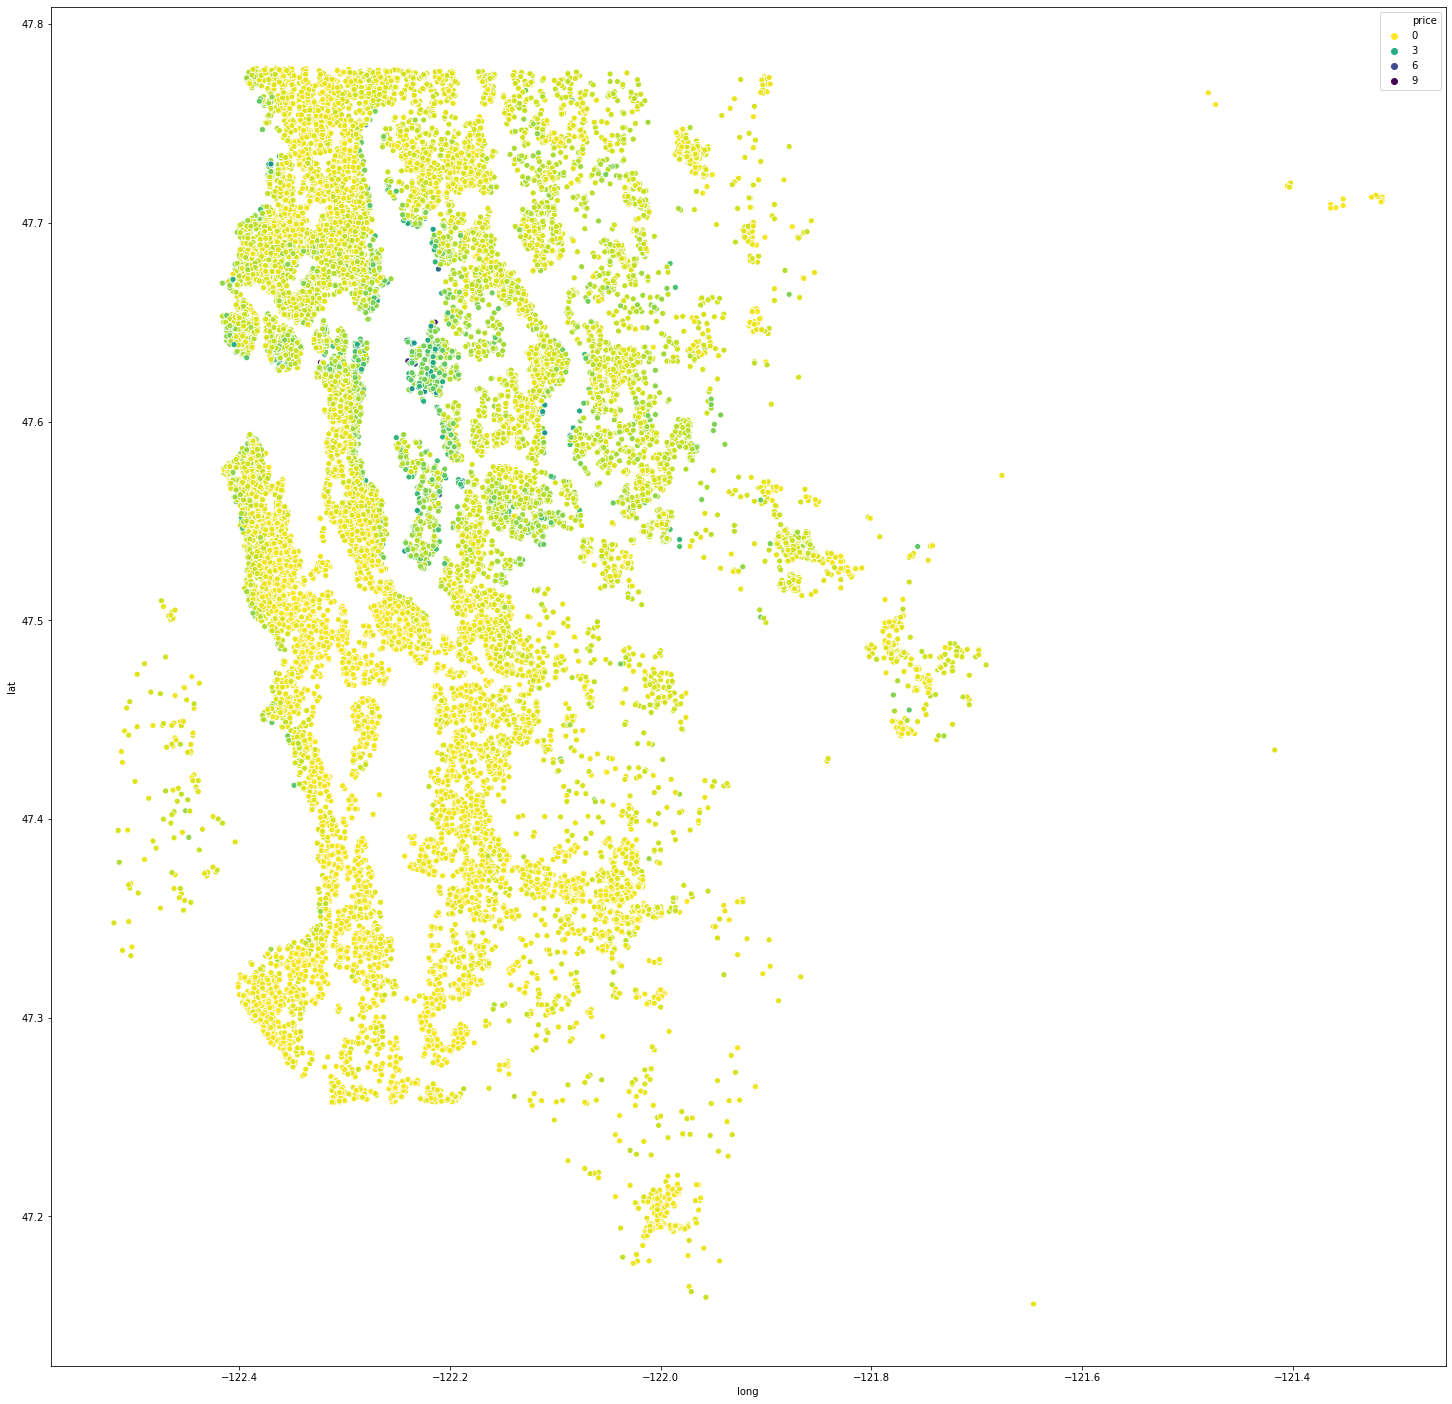

In [11]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="viridis_r");

using latitude and longitude, we basically make a visual map of the King County area. But we can see that there are a few sales in locations that are outliers in some way - possible mis-filed for longitude. I want and need to use location for my model, and sales that are too far outside of our comparison area geographically may add noise to our model. So I'm going to drop the longitude outliers as well.

In [12]:
# determing our center 99% of data for price, lot size, and sq footage

pricelower,priceupper = percentile(df.price)
lotlower,lotupper = percentile(df.sqft_lot)
sqftlower, sqftupper = percentile(df.sqft_living)
longlower, longupper = percentile(df.long)


# dropping the things outside of our lower and upper range

df.drop(df[ (df.price > priceupper) | (df.price < pricelower) ].index , inplace=True)
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)
df.drop(df[ (df.long > longupper) | (df.long < longlower) ].index , inplace=True)


In [13]:
# drop lat and long, we will use zipcode for the location feature
# drop id, we don't need it

#df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [14]:
df

# confirming we still have around 20k entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [15]:
df.describe()

# checking our data again. Bedrooms still seems to have outliers.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.082900e+04,2.082900e+04,20829.000000,20829.000000,20829.000000,20829.000000,20829.000000,18532.000000,20768.000000,20829.000000,20829.000000,20829.000000,20829.000000,17126.000000,20829.000000,20829.000000,20829.000000,20829.000000,20829.000000
mean,4.604038e+09,5.270233e+05,3.384176,2.107338,2061.802727,12551.312593,1.489702,0.005072,0.215668,3.414614,7.646022,1773.924816,1970.867012,82.861556,98078.197705,47.561487,-122.215674,1982.441836,11508.586442
std,2.873004e+09,3.025336e+05,0.910162,0.737239,835.814614,23124.663848,0.536615,0.071041,0.729746,0.649762,1.117994,775.365876,29.282182,398.167262,53.645071,0.138805,0.133947,664.358833,21262.804919
min,1.000102e+06,1.340000e+05,1.000000,0.500000,670.000000,905.000000,1.000000,0.000000,0.000000,1.000000,4.000000,480.000000,1900.000000,0.000000,98001.000000,47.159300,-122.430000,399.000000,651.000000
25%,2.141300e+09,3.249500e+05,3.000000,1.750000,1440.000000,5030.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.473300,-122.327000,1490.000000,5100.000000
50%,3.935900e+09,4.500000e+05,3.000000,2.250000,1920.000000,7560.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1974.000000,0.000000,98065.000000,47.574200,-122.230000,1840.000000,7571.000000
75%,7.319900e+09,6.400000e+05,4.000000,2.500000,2540.000000,10400.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2192.000000,1996.000000,0.000000,98118.000000,47.679200,-122.127000,2360.000000,9934.000000
max,9.900000e+09,2.450000e+06,33.000000,7.500000,5584.000000,247421.000000,3.500000,1.000000,4.000000,5.000000,13.000000,5584.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.760000,5790.000000,434728.000000


In [16]:
df.sort_values('condition', ascending=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16928,5015001680,6/11/2014,427000.0,4,1.00,1860,4736,1.5,0.0,0.0,1,7,1860,0.0,1901,NaN,98112,47.6251,-122.300,1800,4000
1732,913000340,1/2/2015,252000.0,1,1.00,680,1638,1.0,NaN,4.0,1,6,680,0.0,1910,1992.0,98116,47.5832,-122.399,1010,3621
13616,2023049218,3/16/2015,445000.0,2,1.00,930,7740,1.0,0.0,0.0,1,5,930,0.0,1932,NaN,98148,47.4611,-122.324,1620,8584
15323,7849200635,6/30/2014,235000.0,2,1.00,900,28800,1.0,0.0,0.0,1,6,900,0.0,1928,0.0,98065,47.5245,-121.822,1360,7200
15357,7936500221,1/14/2015,658000.0,2,1.00,1010,14244,1.0,1.0,4.0,1,5,1010,0.0,1926,0.0,98136,47.5476,-122.399,1820,15792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18913,3971700330,4/15/2015,415000.0,4,2.00,1780,12161,1.0,0.0,0.0,5,7,1160,620.0,1950,0.0,98155,47.7746,-122.323,1780,8170
18914,5561400220,8/19/2014,592500.0,4,2.50,3370,35150,1.0,NaN,0.0,5,8,1770,1600.0,1993,0.0,98027,47.4610,-122.002,2920,41241
2358,1697000370,3/25/2015,234000.0,3,1.00,1040,8122,1.0,0.0,0.0,5,7,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676
12547,952005000,8/15/2014,545000.0,3,1.75,1700,5750,1.5,0.0,2.0,5,7,1450,250.0,1925,0.0,98126,47.5643,-122.380,1700,5750


In [17]:
#check what is going on with the weird bedroom value

df.sort_values('bedrooms', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,2131700900,8/13/2014,283700.0,1,1.75,1010,10900,1.0,0.0,0.0,4,6,1010,0.0,1968,0.0,98019,47.7391,-121.982,1410,8359
19210,2414600366,11/14/2014,199900.0,1,1.00,720,7140,1.0,0.0,0.0,3,6,720,0.0,1930,0.0,98146,47.5119,-122.339,1140,7577
17893,726059047,12/16/2014,310000.0,1,1.00,920,8282,1.5,0.0,0.0,3,6,920,0.0,1944,NaN,98011,47.7610,-122.214,2260,14025
1387,4102000075,5/22/2014,275000.0,1,0.75,1170,14149,1.0,0.0,0.0,5,7,880,290.0,1962,0.0,98022,47.2653,-121.910,1130,24513


In [18]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

# 11 bedrooms in 3000sf, 10 bedrooms in 2920sf, 10 bedrooms in 3610sf are also obviously mistakes
# We're going to impute the mean into the fields for 10 and 11 bedrooms as well.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 11.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 10.0, 'bedrooms'] = bedroom_mean

df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outliers by imputing the mean
# I remain suspicious of these 9-bedroom entries, but we'll decline from manipulating them further

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16830,8823900290,3/17/2015,1400000.0,9.0,4.00,4620,5508,2.5,0.0,0.0,3,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320
4231,2902200015,1/6/2015,700000.0,9.0,3.00,3680,4400,2.0,0.0,0.0,3,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
18428,8823901445,3/13/2015,934000.0,9.0,3.00,2820,4480,2.0,0.0,0.0,3,7,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400
4092,1997200215,5/7/2014,599999.0,9.0,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
8537,424049043,8/11/2014,450000.0,9.0,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,2131700900,8/13/2014,283700.0,1.0,1.75,1010,10900,1.0,0.0,0.0,4,6,1010,0.0,1968,0.0,98019,47.7391,-121.982,1410,8359
19210,2414600366,11/14/2014,199900.0,1.0,1.00,720,7140,1.0,0.0,0.0,3,6,720,0.0,1930,0.0,98146,47.5119,-122.339,1140,7577
17893,726059047,12/16/2014,310000.0,1.0,1.00,920,8282,1.5,0.0,0.0,3,6,920,0.0,1944,NaN,98011,47.7610,-122.214,2260,14025
1387,4102000075,5/22/2014,275000.0,1.0,0.75,1170,14149,1.0,0.0,0.0,5,7,880,290.0,1962,0.0,98022,47.2653,-121.910,1130,24513


In [19]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2297
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3703
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [21]:
# we've removed the null values from our three binary columns

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [23]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 9828200460    0.000096
7853400250    0.000096
4435000705    0.000096
3293700496    0.000096
1721801010    0.000096
Name: id, dtype: float64 


date 
 6/23/2014    0.006625
6/25/2014    0.006097
6/26/2014    0.006049
4/27/2015    0.005905
3/25/2015    0.005761
Name: date, dtype: float64 


price 
 450000.0    0.008114
350000.0    0.007970
550000.0    0.007442
500000.0    0.007201
425000.0    0.007009
Name: price, dtype: float64 


bedrooms 
 3.0    0.459792
4.0    0.323491
2.0    0.122858
5.0    0.073023
6.0    0.012099
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.254021
1.00    0.175380
1.75    0.142638
2.25    0.096308
2.00    0.090355
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006385
1400    0.006289
1440    0.006289
1660    0.006193
1800    0.006145
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.017092
6000    0.013587
4000    0.011906
7200    0.010418
4800    0.005569
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.496903
2.0    0.3802

In [24]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])


# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold
df['month'] = pd.DatetimeIndex(df['date']).month

In [25]:
# data types are now fixed

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
dtype: object

In [26]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

In [27]:
'''
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');
'''

"\n# check how our histograms are looking\n\ndf.hist(figsize=(18,15), bins='auto');\n"

In [28]:
'''
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()
'''

"\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)\n\nfor ax, column in zip(axes.flatten(), df.columns):\n    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)\n    ax.set_title(f'Sale Price vs {column}')\n    ax.set_xlabel(column)\n    ax.set_ylabel('Sale Price in $100,000')\n\nfig.tight_layout()\n"

In [29]:
'''
# sqft_living has the strongest and most obvious relationship to price thus far
from scipy.stats import linregress

x = 'sqft_living'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])
'''

"\n# sqft_living has the strongest and most obvious relationship to price thus far\nfrom scipy.stats import linregress\n\nx = 'sqft_living'\ny = 'price'\n\nscatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)\n\nlinregress(df[x], df[y])\n"

In [30]:
df['pr_sf'] = df['price']/df['sqft_living']

In [31]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,pr_sf
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,188.050847
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,209.338521
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,233.766234
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,308.163265
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,235.294118
21593,6600060120,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,173.160173
21594,1523300141,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,394.216667
21595,291310100,2015-01-16,400000.0,3.0,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,250.000000


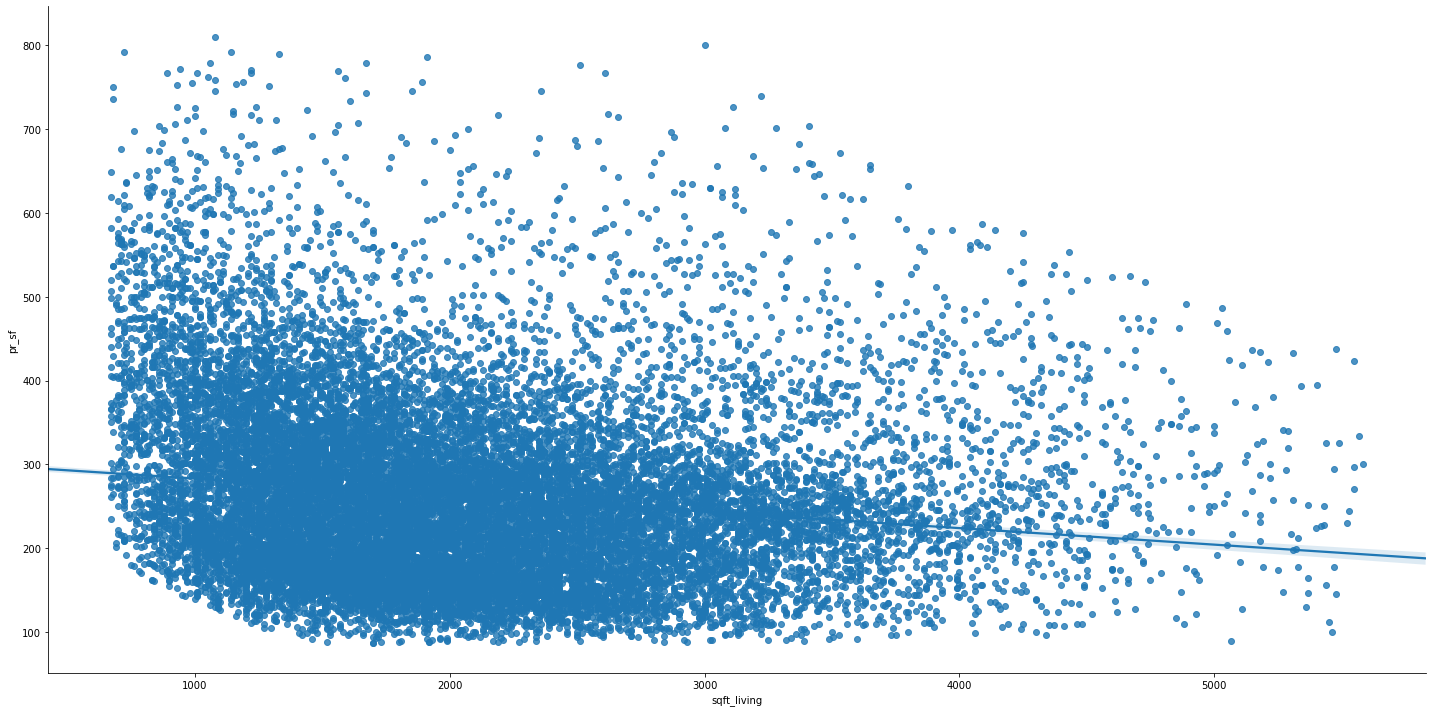

In [32]:
x = 'sqft_living'
y = 'pr_sf'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

# sqft_living has the strongest and most obvious relationship to price thus far

In [33]:
'''



x = 'grade'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])

# grade has a strong relationship, and is listed as the grade given to the property by King County.
# They are using their own predictive algorithm to rate the property and give this number, so it
# makes sense for it to have a strong relationship. I'm not sure I want to use a number that
# a buyer/seller doesn't have available when listing/buying a house. I will probably leave this out.

'''

"\n\n\n\nx = 'grade'\ny = 'price'\n\nscatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)\n\nlinregress(df[x], df[y])\n\n# grade has a strong relationship, and is listed as the grade given to the property by King County.\n# They are using their own predictive algorithm to rate the property and give this number, so it\n# makes sense for it to have a strong relationship. I'm not sure I want to use a number that\n# a buyer/seller doesn't have available when listing/buying a house. I will probably leave this out.\n\n"

## Look for Multicollinearity

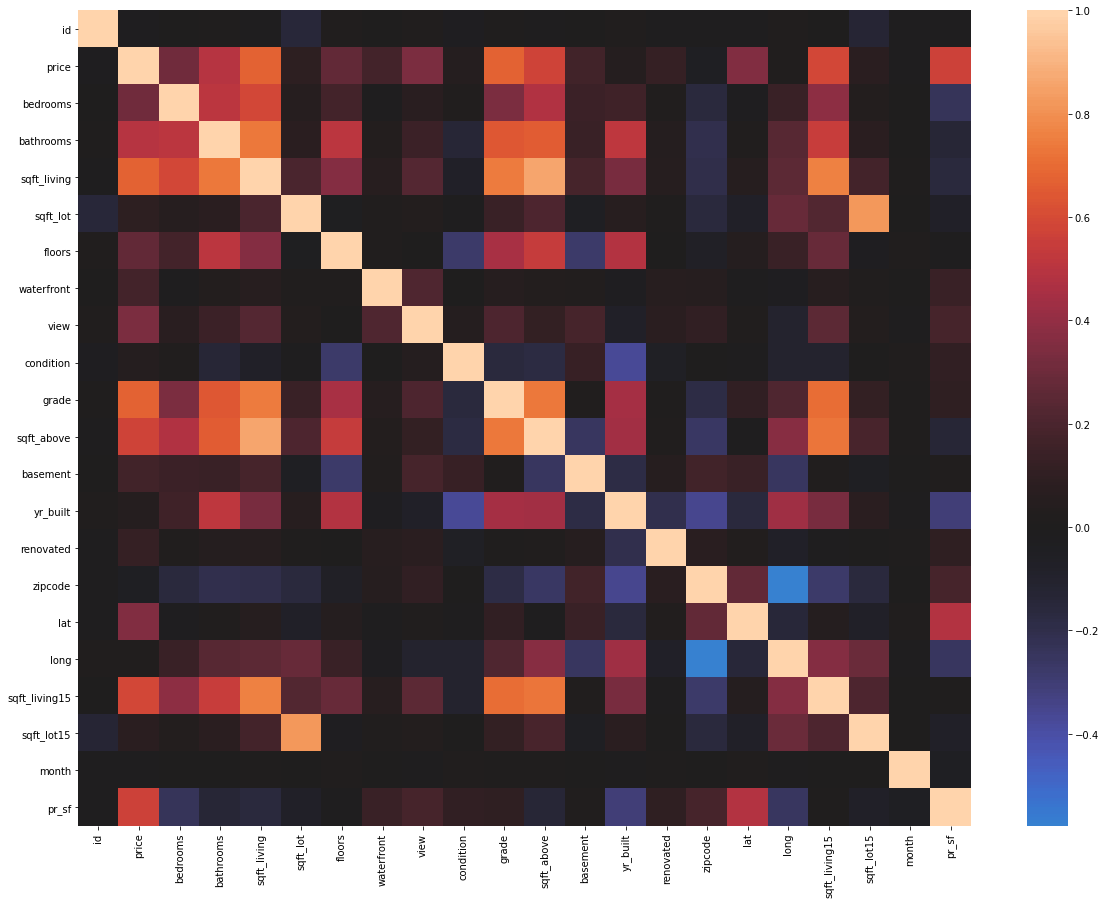

In [34]:
# look for multicollinearity of features
data_pred = df
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [35]:
data_pred.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,pr_sf
id,1.000000,-0.018009,0.000662,0.008740,-0.007455,-0.144259,0.018409,0.006464,0.017836,-0.026472,0.010758,-0.006041,0.002983,0.023307,-0.008489,-0.010578,-0.007738,0.025801,-0.001686,-0.133114,-0.010788,-0.006209
price,-0.018009,1.000000,0.305318,0.492138,0.668353,0.090673,0.269507,0.178007,0.339983,0.039542,0.669158,0.568697,0.169408,0.040674,0.119688,-0.037436,0.356227,0.024499,0.591639,0.074160,-0.017024,0.565466
bedrooms,0.000662,0.305318,1.000000,0.511400,0.591256,0.052894,0.176265,-0.008000,0.068567,0.016740,0.337755,0.476250,0.145661,0.158641,0.016455,-0.153899,-0.022257,0.139908,0.385609,0.038285,-0.001706,-0.233442
bathrooms,0.008740,0.492138,0.511400,1.000000,0.734947,0.080654,0.508326,0.034404,0.146597,-0.136909,0.637918,0.659469,0.139532,0.518011,0.044000,-0.202398,0.014061,0.237463,0.549953,0.071903,0.007380,-0.134551
sqft_living,-0.007455,0.668353,0.591256,0.734947,1.000000,0.201338,0.360833,0.058412,0.234698,-0.068991,0.745456,0.860689,0.184978,0.330768,0.046852,-0.197844,0.044884,0.259805,0.755200,0.177078,0.011364,-0.154447
sqft_lot,-0.144259,0.090673,0.052894,0.080654,0.201338,1.000000,-0.033087,0.017830,0.034826,-0.009961,0.134135,0.208185,-0.038139,0.061181,0.010184,-0.158504,-0.071851,0.289518,0.219017,0.815304,0.001157,-0.075548
floors,0.018409,0.269507,0.176265,0.508326,0.360833,-0.033087,1.000000,0.018645,0.005491,-0.270797,0.456934,0.541272,-0.270598,0.487363,0.004840,-0.062181,0.039957,0.135250,0.281504,-0.027055,0.015763,-0.009063
waterfront,0.006464,0.178007,-0.008000,0.034404,0.058412,0.017830,0.018645,1.000000,0.211480,0.006643,0.055916,0.036739,0.027486,-0.024914,0.058349,0.049050,-0.010552,-0.026886,0.058869,0.021400,-0.001605,0.142755
view,0.017836,0.339983,0.068567,0.146597,0.234698,0.034826,0.005491,0.211480,1.000000,0.042223,0.209401,0.112931,0.183642,-0.074166,0.080091,0.109601,0.016202,-0.098034,0.252705,0.033264,-0.010337,0.181948
condition,-0.026472,0.039542,0.016740,-0.136909,-0.068991,-0.009961,-0.270797,0.006643,0.042223,1.000000,-0.159355,-0.174007,0.130599,-0.366308,-0.056886,0.006252,-0.012328,-0.105423,-0.103140,-0.002455,0.022861,0.103951


In [36]:
#Get our list of highly correlated feature pairs with following steps:

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.75]


,level_0,level_1,correlation
pairs,,,
"(sqft_living, sqft_above)",sqft_living,sqft_above,0.860689
"(sqft_above, sqft_living)",sqft_above,sqft_living,0.860689
"(sqft_lot, sqft_lot15)",sqft_lot,sqft_lot15,0.815304
"(sqft_lot15, sqft_lot)",sqft_lot15,sqft_lot,0.815304
"(sqft_living, sqft_living15)",sqft_living,sqft_living15,0.755200
"(sqft_living15, sqft_living)",sqft_living15,sqft_living,0.755200


In [37]:
# we're going to drop sqft_above, sqft_living15, and sqftlot_15 and just keep the base sqft_living and sqft_lot
# We'll do that simply by excluding them from our processed dataframe


In [38]:
df.reset_index(drop=True, inplace=True)
df

# our dataframe is cleaned and ready for processing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,pr_sf
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,188.050847
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,209.338521
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,233.766234
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,308.163265
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,263000018,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,235.294118
20825,6600060120,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,173.160173
20826,1523300141,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,394.216667
20827,291310100,2015-01-16,400000.0,3.0,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,250.000000


## Separate pre-processing categories

In [39]:
# prepare our categories for data transformation by separating into our data types -
# ordinal, continuous, categorical/dichotomous, and need to be binned/further processed

continuous = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition']
categorical_dichotomous = ['waterfront', 'view', 'renovated','basement']
bins = ['yr_built', 'month', 'zipcode']  
target = ['price']
df_comps = df[['lat', 'long', 'price', 'sqft_lot', 'bedrooms', 'condition']] #  'sqft_living', 

### Target Variable

In [40]:
# our target variable of "price" log transformed

df_target = df[target]

log_names = [f'{column}' for column in df_target.columns]

df_target_log = np.log(df_target)
df_target_log.columns = log_names

df_target_log

,price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166
...,...
20824,12.793859
20825,12.899220
20826,12.904459
20827,12.899220


Dataframes produced:
* df_target = price column
* df_target_log = price column log transformed

### High cardinality categoricals (Year, Month, Zip)

In [41]:
df_bins = df[bins]
df_bins

,yr_built,month,zipcode
0,1955,10,98178
1,1951,12,98125
2,1933,2,98028
3,1965,12,98136
4,1987,2,98074
...,...,...,...
20824,2009,5,98103
20825,2014,2,98146
20826,2009,6,98144
20827,2004,1,98027


In [42]:
'''
# Let's check our relationship with price and month of the year sold

df_bins['price'] = df['price']

y = 'price'
x = 'month'

scatter = sns.lmplot(x=x, y=y, data=df_bins, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df_bins[x], df_bins[y])

# This slope is nearly flat
'''

"\n# Let's check our relationship with price and month of the year sold\n\ndf_bins['price'] = df['price']\n\ny = 'price'\nx = 'month'\n\nscatter = sns.lmplot(x=x, y=y, data=df_bins, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)\n\nlinregress(df_bins[x], df_bins[y])\n\n# This slope is nearly flat\n"

In [43]:
'''

monthly_prices = df_bins.groupby('month')['price'].mean()
month = df_bins['month'].unique()

plt.scatter(month, monthly_prices)
plt.title("Linearity check")
plt.show()
'''
# It seems that the average price of a home DOES change with the month. Based on this chart, we will divide our year into four quarters.

'\n\nmonthly_prices = df_bins.groupby(\'month\')[\'price\'].mean()\nmonth = df_bins[\'month\'].unique()\n\nplt.scatter(month, monthly_prices)\nplt.title("Linearity check")\nplt.show()\n'

In [44]:
# group our dataframe by month with average price
monthranks = pd.DataFrame(df.groupby('month')['price'].mean())

# set the entries per segment into which to bin our variable
entries = 2

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthranks['quarter'] = np.divmod(np.arange(len(monthranks)),entries)[0]+1

# make a new column on our dataframe. Look up each month entry's segment, and append to the column.
df_bins['quarter'] = df_bins['month'].apply(lambda x: make_group(x, monthranks, 'quarter'))


In [45]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),entries)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [46]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
zipsorted.drop('price', axis=1, inplace=True)
zipsorted.sort_index(inplace=True, ascending=True)
zipsorted

,rank
zipcode,
98001,4
98002,1
98003,7
98004,69
98005,66
...,...
98177,46
98178,10
98188,5


In [47]:
# defining our new zip_group and quarter columns as categorical

df_bins['zip_group'] = df_bins['zip_group'].astype('category')
df_bins['quarter'] = df_bins['quarter'].astype('category')

In [48]:
# adding a new column to our dataframe
# binning our year built into equally sized bins, where each bin has the same number of entries

df_bins["year_block"] = pd.qcut(df['yr_built'], q=6)

df_bins

,yr_built,month,zipcode,quarter,zip_group,year_block
0,1955,10,98178,5,10,"(1942.0, 1959.0]"
1,1951,12,98125,6,31,"(1942.0, 1959.0]"
2,1933,2,98028,1,36,"(1899.999, 1942.0]"
3,1965,12,98136,6,41,"(1959.0, 1974.0]"
4,1987,2,98074,1,56,"(1974.0, 1988.0]"
...,...,...,...,...,...,...
20824,2009,5,98103,3,48,"(2003.0, 2015.0]"
20825,2014,2,98146,1,18,"(2003.0, 2015.0]"
20826,2009,6,98144,3,37,"(2003.0, 2015.0]"
20827,2004,1,98027,1,51,"(2003.0, 2015.0]"


In [49]:
dummybins = ['zip_group', 'quarter', 'year_block']

# make a processed bins file for use with linear regression
processed_bins = pd.get_dummies(df_bins[dummybins], prefix=dummybins, drop_first=True)

In [50]:
processed_bins

,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10,zip_group_11,zip_group_12,zip_group_13,zip_group_14,zip_group_15,zip_group_16,zip_group_17,zip_group_18,zip_group_19,zip_group_20,zip_group_21,zip_group_22,zip_group_23,zip_group_24,zip_group_25,zip_group_26,zip_group_27,zip_group_28,zip_group_29,zip_group_30,zip_group_31,zip_group_32,zip_group_33,zip_group_34,zip_group_35,zip_group_36,zip_group_37,zip_group_38,zip_group_39,zip_group_40,zip_group_41,zip_group_42,zip_group_43,zip_group_44,zip_group_45,zip_group_46,zip_group_47,zip_group_48,zip_group_49,zip_group_50,zip_group_51,zip_group_52,zip_group_53,zip_group_54,zip_group_55,zip_group_56,zip_group_57,zip_group_58,zip_group_59,zip_group_60,zip_group_61,zip_group_62,zip_group_63,zip_group_64,zip_group_65,zip_group_66,zip_group_67,zip_group_68,zip_group_69,zip_group_70,quarter_2,quarter_3,quarter_4,quarter_5,quarter_6,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1974.0]","year_block_(1974.0, 1988.0]","year_block_(1988.0, 2003.0]","year_block_(2003.0, 2015.0]"
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
20825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
20827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Dichotomous Categoricals (waterfront, view, renovated, basement)

In [51]:
# remind myself of the list of things I am converting

categorical_dichotomous

['waterfront', 'view', 'renovated', 'basement']

In [52]:
# make sure these are category type

df[categorical_dichotomous] = df[categorical_dichotomous].astype('category')

# make dummies in a new df
processed_cats = pd.get_dummies(df[categorical_dichotomous], prefix=categorical_dichotomous, drop_first=True)

# new dataframe of dummy categorical data, ready to add to final df

processed_cats

,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0
0,0,0,0,0
1,0,0,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
20824,0,0,0,0
20825,0,0,0,0
20826,0,0,0,0
20827,0,0,0,0


### Set - Continuous

In [53]:
continuous

['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition']

In [54]:
df_continuous = df[continuous]
df_continuous

,sqft_living,sqft_lot,floors,bedrooms,bathrooms,condition
0,1180,5650,1.0,3.0,1.00,3
1,2570,7242,2.0,3.0,2.25,3
2,770,10000,1.0,2.0,1.00,3
3,1960,5000,1.0,4.0,3.00,5
4,1680,8080,1.0,3.0,2.00,3
...,...,...,...,...,...,...
20824,1530,1131,3.0,3.0,2.50,3
20825,2310,5813,2.0,4.0,2.50,3
20826,1020,1350,2.0,2.0,0.75,3
20827,1600,2388,2.0,3.0,2.50,3


In [55]:
'''
# check out our histograms for our continuous data

for column in df_continuous:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()
    
'''

"\n# check out our histograms for our continuous data\n\nfor column in df_continuous:\n    df[column].plot.hist(density=True, label = column+' histogram')\n    df[column].plot.kde(label =column+' kde')\n    plt.legend()\n    plt.show()\n    \n"

In [56]:
'''

# let's check linearity of these features with our target data

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous.sqft_living, df_target.price)
plt.show()

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous.sqft_lot, df_target.price)
plt.show()

'''


"\n\n# let's check linearity of these features with our target data\n\nfig, axs = plt.subplots(figsize=(20, 6))\nplt.scatter(df_continuous.sqft_living, df_target.price)\nplt.show()\n\nfig, axs = plt.subplots(figsize=(20, 6))\nplt.scatter(df_continuous.sqft_lot, df_target.price)\nplt.show()\n\n"

In [57]:
# We're going to try transforming and standardizing all of these.

# log features
log_names = [f'{column}' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names

In [58]:
'''

# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks better

'''

"\n\n# check out our histograms for our transformed data\n\ndf_continuous_log.hist(figsize=(18,15), bins='auto');\n\n# looks better\n\n"

In [59]:
'''

# let's check linearity of these features with our target data

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous_log.sqft_living, df_target.price)
plt.show()

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous_log.sqft_lot, df_target.price)
plt.show()

'''

"\n\n# let's check linearity of these features with our target data\n\nfig, axs = plt.subplots(figsize=(20, 6))\nplt.scatter(df_continuous_log.sqft_living, df_target.price)\nplt.show()\n\nfig, axs = plt.subplots(figsize=(20, 6))\nplt.scatter(df_continuous_log.sqft_lot, df_target.price)\nplt.show()\n\n"

In [60]:
# normalize with scikit-learn StandardScaler

#def normalize(feature):
#    return (feature - feature.mean()) / feature.std()

#df_transformed = normalize_this.apply(normalize)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#df_transformed = scaler.fit_transform(normalize_this)

df_transformed = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous_log.columns)

In [61]:
df_transformed

,sqft_living,sqft_lot,floors,bedrooms,bathrooms,condition
0,-1.185273,-0.387367,-0.956580,-0.308940,-1.762937,-0.626213
1,0.744801,-0.088597,1.017377,-0.308940,0.348304,-0.626213
2,-2.243748,0.299772,-0.956580,-1.795746,-1.762937,-0.626213
3,0.072934,-0.534461,-0.956580,0.745965,1.097279,2.210877
4,-0.309293,0.043185,-0.956580,-0.308940,0.041658,-0.626213
...,...,...,...,...,...,...
20824,-0.541197,-2.323332,2.172067,-0.308940,0.622608,-0.626213
20825,0.480334,-0.353136,1.017377,0.745965,0.622608,-0.626213
20826,-1.546575,-2.110302,1.017377,-1.795746,-2.511912,-0.626213
20827,-0.430272,-1.423858,1.017377,-0.308940,0.622608,-0.626213


In [62]:
processed_cats

,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0
0,0,0,0,0
1,0,0,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
20824,0,0,0,0
20825,0,0,0,0
20826,0,0,0,0
20827,0,0,0,0


In [63]:
processed_bins

,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10,zip_group_11,zip_group_12,zip_group_13,zip_group_14,zip_group_15,zip_group_16,zip_group_17,zip_group_18,zip_group_19,zip_group_20,zip_group_21,zip_group_22,zip_group_23,zip_group_24,zip_group_25,zip_group_26,zip_group_27,zip_group_28,zip_group_29,zip_group_30,zip_group_31,zip_group_32,zip_group_33,zip_group_34,zip_group_35,zip_group_36,zip_group_37,zip_group_38,zip_group_39,zip_group_40,zip_group_41,zip_group_42,zip_group_43,zip_group_44,zip_group_45,zip_group_46,zip_group_47,zip_group_48,zip_group_49,zip_group_50,zip_group_51,zip_group_52,zip_group_53,zip_group_54,zip_group_55,zip_group_56,zip_group_57,zip_group_58,zip_group_59,zip_group_60,zip_group_61,zip_group_62,zip_group_63,zip_group_64,zip_group_65,zip_group_66,zip_group_67,zip_group_68,zip_group_69,zip_group_70,quarter_2,quarter_3,quarter_4,quarter_5,quarter_6,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1974.0]","year_block_(1974.0, 1988.0]","year_block_(1988.0, 2003.0]","year_block_(2003.0, 2015.0]"
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
20825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
20827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Final Prep for Linear Regression

In [64]:
preprocessed_scaled = pd.concat([df_target_log, df_transformed, processed_cats, processed_bins], axis=1)

In [65]:
# preprocessed data ready for linear regression algorithm

preprocessed_scaled

,price,sqft_living,sqft_lot,floors,bedrooms,bathrooms,condition,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10,zip_group_11,zip_group_12,zip_group_13,zip_group_14,zip_group_15,zip_group_16,zip_group_17,zip_group_18,zip_group_19,zip_group_20,zip_group_21,zip_group_22,zip_group_23,zip_group_24,zip_group_25,zip_group_26,zip_group_27,zip_group_28,zip_group_29,zip_group_30,zip_group_31,zip_group_32,zip_group_33,zip_group_34,zip_group_35,zip_group_36,zip_group_37,zip_group_38,zip_group_39,zip_group_40,zip_group_41,zip_group_42,zip_group_43,zip_group_44,zip_group_45,zip_group_46,zip_group_47,zip_group_48,zip_group_49,zip_group_50,zip_group_51,zip_group_52,zip_group_53,zip_group_54,zip_group_55,zip_group_56,zip_group_57,zip_group_58,zip_group_59,zip_group_60,zip_group_61,zip_group_62,zip_group_63,zip_group_64,zip_group_65,zip_group_66,zip_group_67,zip_group_68,zip_group_69,zip_group_70,quarter_2,quarter_3,quarter_4,quarter_5,quarter_6,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1974.0]","year_block_(1974.0, 1988.0]","year_block_(1988.0, 2003.0]","year_block_(2003.0, 2015.0]"
0,12.309982,-1.185273,-0.387367,-0.956580,-0.308940,-1.762937,-0.626213,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,13.195614,0.744801,-0.088597,1.017377,-0.308940,0.348304,-0.626213,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,12.100712,-2.243748,0.299772,-0.956580,-1.795746,-1.762937,-0.626213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,0.072934,-0.534461,-0.956580,0.745965,1.097279,2.210877,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,13.142166,-0.309293,0.043185,-0.956580,-0.308940,0.041658,-0.626213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,12.793859,-0.541197,-2.323332,2.172067,-0.308940,0.622608,-0.626213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
20825,12.899220,0.480334,-0.353136,1.017377,0.745965,0.622608,-0.626213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20826,12.904459,-1.546575,-2.110302,1.017377,-1.795746,-2.511912,-0.626213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
20827,12.899220,-0.430272,-1.423858,1.017377,-0.308940,0.622608,-0.626213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
'''
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), preprocessed_scaled.columns):
    ax.scatter(preprocessed_scaled[column], preprocessed_scaled['price'], label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price(Scaled)')

fig.tight_layout()
'''

"\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)\n\nfor ax, column in zip(axes.flatten(), preprocessed_scaled.columns):\n    ax.scatter(preprocessed_scaled[column], preprocessed_scaled['price'], label=column, alpha=.1)\n    ax.set_title(f'Sale Price vs {column}')\n    ax.set_xlabel(column)\n    ax.set_ylabel('Sale Price(Scaled)')\n\nfig.tight_layout()\n"

In [67]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [68]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

# Models

Steps:
* Divide data into a train/validation set and a test set
* Train our model on the train/validation set
* Validate our model using cv on the train/validation set
* Test our model on our test set

In [69]:
models = {}
models['Models'] = []
models['r2'] = []
models['mae'] = []

## Base Linear Regression Model

Run a base model with no cross-validation or specific feature selection to see our base model scores.

In [70]:
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1160.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:09:15   Log-Likelihood:                 4426.0
No. Observations:               16663   AIC:                            -8672.
Df Residuals:                   16573   BIC:                            -7977.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5013      0.017    756.919      0.000      12.469      12.534
sqft_living                     0.2520      0.003     85.878      0.000       0.246       0.258
sqft_lot                        0.0726      0.002     32.232      0.000       0.068       0.077
floors                         -0.0061      0.002     -2.531      0.011      -0.011      -0.001
bedrooms                       -0.0233      0.002    -11.736      0.000      -0.027      -0.019
bathrooms                       0.0227      0.003      8.519      0.000       0.017       0.028
condition                       0.0310      0.002     18.546      0.000       0.028       0.034
waterfront_1.0                  0.5734      0.021     27.084      0.000       0.532       0.615
view_1.0                        0.1958      0.006     35.466      0.000       0.185       0.207
renovated_1.0                   0.0667      0.008      7.859      0.000       0.050       0.083
basement_1.0                   -0.0658      0.004    -16.995      0.000      -0.073      -0.058
zip_group_2                     0.1214      0.020      5.993      0.000       0.082       0.161
zip_group_3                     0.0814      0.024      3.356      0.001       0.034       0.129
zip_group_4                     0.0317      0.019      1.681      0.093      -0.005       0.069
zip_group_5                     0.1453      0.024      6.083      0.000       0.099       0.192
zip_group_6                     0.1184      0.020      5.963      0.000       0.079       0.157
zip_group_7                     0.0836      0.020      4.241      0.000       0.045       0.122
zip_group_8                     0.0610      0.018      3.403      0.001       0.026       0.096
zip_group_9                     0.0262      0.021      1.239      0.215      -0.015       0.068
zip_group_10                    0.1909      0.020      9.549      0.000       0.152       0.230
zip_group_11                    0.2444      0.031      7.780      0.000       0.183       0.306
zip_group_12                    0.0780      0.020      3.836      0.000       0.038       0.118
zip_group_13                    0.1161      0.020      5.811      0.000       0.077       0.155
zip_group_14                    0.0990      0.018      5.601      0.000       0.064       0.134
zip_group_15                    0.2050      0.020     10.208      0.000       0.166       0.244
zip_group_16                    0.0613      0.019      3.239      0.001       0.024       0.098
zip_group_17                    0.4065      0.019     21.209      0.000       0.369       0.444
zip_group_18                    0.3480      0.020     17.454      0.000       0.309       0.387
zip_group_19                    0.2363      0.018     13.098      0.000       0.201       0.272
zip_group_2

Perform cross-validation with our model over 5 splits and get our mean R^2.

In [71]:
model = LinearRegression()
model.fit(X_train_val, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8599256075373141

In [72]:
# How many predictors are in our base model?
print("{} predictors used for this model".format(X.shape[1]))

89 predictors used for this model


In [73]:
# apply our model to our test set and get predicted values
test_predictions = model.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_basiclr = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_basiclr

,Actual,Predicted
3544,620000,736493
4760,625000,404439
4096,261500,289306
17592,478999,412510
17574,487999,472456
...,...,...
19631,362865,350505
15127,1680000,1635063
19460,970000,647495
18439,398999,335201


In [74]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

74297.98

In [75]:
models['Models'].append('Basic LR')
models['r2'].append(r2)
models['mae'].append(mae)

### Add Interactions

I wrote a function which finds ALL of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression with cross validation on 5 folds and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo. 

In [76]:
def test_feature_combinations(data):
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(data.columns)
    features.remove('price')

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = data['price']
    
    # prepare our x-value with our independent variables. We do a split here in order to run a linear regression to get a
    # base r^2 on our basic model without interactions
    X = data.drop('price', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
    base_score = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv))   
    print("Model base score is ",base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        data['test_interaction'] = data[feat1] * data[feat2]
        # create a new X which includes the test interaction and drops our target value
        X = data.drop('price', axis=1)
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv))
        scores.append(new_score)
        # put feature 1 on a list
        feature1.append(feat1)
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
    
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    
    # return our scoring dataframe to the function
    return scoring_df

In [77]:
# We ran this script below once and exported the results
#scoring_df = test_feature_combinations(preprocessed_scaled)

# we're exporting our interactions results to a csv, because we don't need to run it again
#scoring_df.to_csv('interactions.csv')

In [78]:
scoring_df = pd.read_csv('interactions.csv')

scoring_df.sort_values('improvement', ascending=False)

,Unnamed: 0,feature1,feature2,scores,improvement
1,1,sqft_living,floors,0.860423,0.004291
3,3,sqft_living,bathrooms,0.859970,0.003838
87,87,sqft_living,"year_block_(2003.0, 2015.0]",0.858170,0.002038
175,175,floors,bedrooms,0.857872,0.001740
145,145,sqft_lot,zip_group_51,0.857816,0.001684
...,...,...,...,...,...
754,754,renovated_1.0,"year_block_(1988.0, 2003.0]",0.856001,-0.000131
302,302,bedrooms,zip_group_37,0.855991,-0.000141
3208,3208,zip_group_42,"year_block_(1942.0, 1959.0]",0.855948,-0.000184
679,679,renovated_1.0,zip_group_4,0.855926,-0.000206


We will add the "sqft_living" and "floors" interaction

## Linear Regression - Feature Selectors

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

In [79]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

#X = preprocessed_scaled.drop('price', axis=1)
#y = preprocessed_scaled['price']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
#actual = np.exp(y_test)

In [80]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train_val, y_train_val, verbose=True)

print('resulting features:', result)

Add  bathrooms                      with p-value 0.0
Add  view_1.0                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zip_group_69                   with p-value 1.79657e-177
Add  zip_group_8                    with p-value 1.2615e-165
Add  zip_group_14                   with p-value 1.21875e-132
Add  zip_group_4                    with p-value 1.46477e-134
Add  zip_group_67                   with p-value 3.17232e-121
Add  zip_group_16                   with p-value 4.12757e-116
Add  zip_group_20                   with p-value 2.45918e-124
Add  zip_group_7                    with p-value 1.69999e-130
Add  zip_group_6                    with p-value 4.76772e-108
Add  zip_group_12                   with p-value 6.23784e-112
Add  zip_group_19                   with p-value 5.28827e-120
Add  zip_group_13                   with p-value 1.01276e-122
Add  zip_group_2                    with p-value 5.99291e-119
Add  zip_group_10                   

In [82]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

predictors_int = sm.add_constant(X_train_refined)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1287.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:21:58   Log-Likelihood:                 4404.0
No. Observations:               16663   AIC:                            -8646.
Df Residuals:                   16582   BIC:                            -8021.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5486      0.008   1641.929      0.000      12.534      12.564
bathrooms                       0.0219      0.003      8.272      0.000       0.017       0.027
view_1.0                        0.1962      0.006     35.522      0.000       0.185       0.207
sqft_living                     0.2504      0.003     87.820      0.000       0.245       0.256
zip_group_69                    1.1953      0.014     88.091      0.000       1.169       1.222
zip_group_4                    -0.0307      0.012     -2.485      0.013      -0.055      -0.006
zip_group_67                    1.1413      0.015     76.394      0.000       1.112       1.171
zip_group_6                     0.0559      0.014      4.036      0.000       0.029       0.083
zip_group_13                    0.0548      0.014      3.920      0.000       0.027       0.082
zip_group_9                    -0.0348      0.016     -2.228      0.026      -0.065      -0.004
zip_group_68                    0.9925      0.014     72.254      0.000       0.966       1.019
zip_group_58                    1.0213      0.015     66.762      0.000       0.991       1.051
zip_group_48                    0.8655      0.011     78.805      0.000       0.844       0.887
zip_group_64                    1.0654      0.017     63.103      0.000       1.032       1.099
zip_group_49                    0.8532      0.011     79.185      0.000       0.832       0.874
zip_group_45                    0.8456      0.011     77.275      0.000       0.824       0.867
waterfront_1.0                  0.5701      0.021     26.930      0.000       0.529       0.612
zip_group_59                    0.8286      0.011     72.629      0.000       0.806       0.851
zip_group_60                    0.9345      0.013     69.972      0.000       0.908       0.961
zip_group_70                    1.3604      0.035     38.751      0.000       1.292       1.429
zip_group_63                    1.0647      0.021     50.982      0.000       1.024       1.106
zip_group_53                    0.8802      0.014     63.538      0.000       0.853       0.907
zip_group_61                    1.0985      0.022     50.462      0.000       1.056       1.141
zip_group_43                    0.8844      0.015     60.191      0.000       0.856       0.913
sqft_lot                        0.0739      0.002     33.524      0.000       0.070       0.078
zip_group_50                    0.7963      0.013     60.520      0.000       0.770       0.822
zip_group_65                    0.7427      0.011     68.523      0.000       0.721       0.764
basement_1.0                   -0.0614      0.003    -17.561      0.000      -0.068      -0.055
zip_group_37                    0.7067      0.013     53.954      0.000       0.681       0.732
zip_group_5

In [83]:
print("{} predictors used".format(len(result)))

80 predictors used


In [86]:
model = LinearRegression()
model.fit(X_train_refined, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8597629293625315

In [87]:
# apply our model to our test set and get predicted values
test_predictions_refined = model.predict(X_test_refined)

# reverse log transform our predicted values
test_predictions_refined_unscaled = np.exp(test_predictions_refined)
test_predictions_refined_unscaled

predicted_prices_forwardstep = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_refined_unscaled.astype(int)})
predicted_prices_forwardstep

,Actual,Predicted
3544,620000,730852
4760,625000,400306
4096,261500,288823
17592,478999,408258
17574,487999,473382
...,...,...
19631,362865,350528
15127,1680000,1655289
19460,970000,653194
18439,398999,335018


In [88]:
mae = round(mean_absolute_error(test_actual, test_predictions_refined_unscaled), 2)
mae

74307.08

No change to our model accuracy. The predictors we dropped were clearly trivial.

In [89]:
models['Models'].append('Forw-Back Selector')
models['r2'].append(r2)
models['mae'].append(mae)

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklean LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_val, y_train_val)

perm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train_val)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
# sorted list of relative feature importance via permutation importance

eli = pd.DataFrame(zip(X.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli.tail(30)

In [ ]:
result_eli5 = list(eli[:76][0])
result_eli5

In [ ]:
# Run our linear regression again, using the features recommended by our feature selector

X_eli5 = X_train[result_eli5]
y_eli5 = y_train

predictors_int = sm.add_constant(X_eli5)
model = sm.OLS(y_eli5, predictors_int).fit()
model.summary()

In [ ]:
model = LinearRegression()
model.fit(X_eli5, y_train)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_eli5, y_train_val, cv=5)
r2 = cv_5.mean()
r2

In [ ]:
X_test_eli5 = X_test[result_eli5]

eli5_predictions = model.predict(X_test_eli5)

eli5_predictions_unscaled = np.exp(eli5_predictions)
eli5_predictions_unscaled

predicted_prices_eli5 = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": eli5_predictions_unscaled.astype(int)})
predicted_prices_eli5

In [ ]:
mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)
mae

In [ ]:
models['Models'].append('Permutation Importance')
models['r2'].append(r2)
models['mae'].append(mae)

### Recursive Feature Elimination with Cross Validation - Linear Regression

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='r2')

rfecv.fit(X_train_val, y_train_val)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

dset

In [ ]:
results = pd.DataFrame()
results['attr'] = X.columns
results['used'] = rfecv.support_

rfecv_result = list(dset[(dset['used'] == True)]['attr'])
rfecv_result

In [ ]:
r2 = rfecv.grid_scores_[88]

In [ ]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_rfecv = X_train_val[rfecv_result]
X_test_rfecv = X_test[rfecv_result]

predictors_int = sm.add_constant(X_train_rfecv)
model = sm.OLS(y_train, predictors_int).fit()
model.summary()

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('R2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
rfecv_predictions = rfecv.predict(X_test)

rfecv_predictions_unscaled = np.exp(rfecv_predictions)
rfecv_predictions_unscaled

predicted_prices_rfecv = pd.DataFrame({"price": test_actual.astype(int), "lr_predicted": rfecv_predictions_unscaled.astype(int)})

predicted_prices_rfecv

In [ ]:
mae = round(mean_absolute_error(test_actual, rfecv_predictions_unscaled), 2)

In [ ]:
models['Models'].append('RFECV')
models['r2'].append(r2)
models['mae'].append(mae)

### Visualizing R2 at different features selected

In [ ]:
# explore the number of selected features for RFE

# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(50, 96):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_val, y_train_val)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
break

## Custom LAD Regression Model

Least Absolute Deviations model (uses MAE to optimize model)

In [ ]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [ ]:
model = LADRegression()

model.fit(X_train_val, y_train_val)

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

In [ ]:
predictions_LAD = model.predict(X_test)
predictions_LAD_unscaled = np.exp(predictions_LAD)

In [ ]:
mae = round(mean_absolute_error(test_actual, predictions_LAD_unscaled), 2)
mae

In [ ]:
models['Models'].append('LAD Regression')
models['r2'].append(r2)
models['mae'].append(mae)

## SVR

In [ ]:
# Linear Support vector regression

svr = SVR()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_val_score(svr, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

In [ ]:
svr.fit(X_train_val, y_train_val)
predictions_SVR = model.predict(X_test)
predictions_SVR_unscaled = np.exp(predictions_SVR)

In [ ]:
preds_unscaled
mae = round(mean_absolute_error(test_actual, predictions_SVR_unscaled), 2)
mae

In [ ]:
models['Models'].append('SVR')
models['r2'].append(r2)
models['mae'].append(mae)

## Elastic Net Regression

In [ ]:
# Elastic Net regression

from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV(cv=5, random_state=0)
elasticnet.fit(X_train_val, y_train_val)
r2 = elasticnet.score(X_train_val, y_train_val)
r2

In [ ]:
predictions_elastic = elasticnet.predict(X_test)
predictions_elastic_unscaled = np.exp(predictions_elastic)

In [ ]:
preds_unscaled
mae = round(mean_absolute_error(test_actual, predictions_elastic_unscaled), 2)
mae

In [ ]:
models['Models'].append('Elastic Net')
models['r2'].append(r2)
models['mae'].append(mae)

## Lasso Regression

In [ ]:
# Lasso regression

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_val, y_train_val)
r2 = lasso.score(X_train_val, y_train_val)
r2

In [ ]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso_unscaled = np.exp(predictions_lasso)

In [ ]:
preds_unscaled
mae = round(mean_absolute_error(test_actual, predictions_lasso_unscaled), 2)
mae

In [ ]:
models['Models'].append('Lasso')
models['r2'].append(r2)
models['mae'].append(mae)

In [ ]:
break

# Comps "Model"

In [ ]:
df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition']]
df_comps

In [ ]:
df_comps.describe()

In [ ]:
dataset = list(zip(df_comps['lat'],df_comps['long']))
df_comps['coordinates'] = dataset
df_comps['comps_est'] = np.NaN
df_comps.reset_index(inplace=True, drop=True)
df_comps

In [ ]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df_comps, x="long", y="lat", hue="price", palette="viridis_r");

Generate comps

* Generate a sq footage % range
* Generate a lot size % range
* Decide if +/- 1 bedroom is acceptable
* Decide if +/- 1 condition is acceptable


* For KNN:
    * For each entry:
    * establish comp requirements
    * create comp dataframe
    * determine neighborhood inclusion zone using within reasonable lat/long
    * create check dataframe which only includes entries within the inclusion zone
    * make sure there are at least x entries available. If not, increase inclusion zone.
    * calculate euclidian distance against all entries in inclusion zone
    * store euclidian distance to dataframe column for local zone
    * accept top x entries by euclidian distance


## Function

In [ ]:
def inclusion_zone(base_property, housing_set):
    lat = base_property['lat']
    long = base_property['long']
    eligible_zone = housing_set.loc[(housing_set['lat'] >= (lat-latrange)) & 
                                        (housing_set['lat'] <= (lat+latrange))&
                                      (housing_set['long'] >= (long-longrange)) & 
                                       (housing_set['long'] <= (long+longrange))]
    return eligible_zone

def find_comps(base_property, housing_set, bedrooms, condition):
    eligible_zone = inclusion_zone(base_property, housing_set)
    price = base_property['price']
    sqft = base_property['sqft_living']
    lot = base_property['sqft_lot']
    
    eligible_homes = eligible_zone.loc[(eligible_zone['price'] >= (price*(1-pricerange))) & 
                                    (eligible_zone['price'] <= (price*(1+pricerange))) &
                                  (eligible_zone['sqft_living'] >= (sqft*(1-sqftrange))) & 
                                   (eligible_zone['sqft_living'] <= (sqft*(1+sqftrange))) &
                                  (eligible_zone['sqft_lot'] >= (lot*(1-lotrange))) & 
                                   (eligible_zone['sqft_lot'] <= (lot*(1+lotrange))) &
                                  (eligible_zone['bedrooms'] >= (bedrooms-(1+bedmod))) & 
                                   (eligible_zone['bedrooms'] <= (bedrooms+(1+bedmod))) &
                                  (eligible_zone['condition'] >= (condition-(1+condmod))) & 
                                   (eligible_zone['condition'] <= (condition + (1+condmod)))]
    return eligible_homes


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def comp_value(base_property, housing_set):
    bedrooms = base_property['bedrooms']
    condition = base_property['condition']
    start_coordinates = base_property['coordinates']
    eligible_homes = find_comps(base_property, housing_set, bedrooms, condition)
    #eligible_homes = eligible_homes.drop([base_property.name], axis=0)
    if eligible_homes.shape[0] >= 11:
        eligible_homes['distance'] = eligible_homes['coordinates'].apply(lambda x: euclidean_distance(start_coordinates, x))
        eligible_homes = eligible_homes.sort_values('distance', ascending=True)
        current_index = base_property.name
        comps = eligible_homes.iloc[:6]
        comp_value = round(np.mean(comps['price']), 0)
        return comp_value
    else:
        return np.nan
    

## Comps Model

In [ ]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
actual = np.exp(y_test)

In [ ]:
compsfinder = df.loc[X_train.index]
dataset = list(zip(compsfinder['lat'],compsfinder['long']))
compsfinder['coordinates'] = dataset

getcomps = df.loc[X_test.index]
dataset = list(zip(getcomps['lat'],getcomps['long']))
getcomps['coordinates'] = dataset
getcomps['comps_est'] = np.NaN
getcomps


### TO DO:

* Run multiple variations of changes to hyperparameters looking for the most accurate params way to capture comps effectively


In [ ]:
getcomps['comps_est'].isna().sum()

In [ ]:
latrange = .05
longrange = .05
pricerange = .1
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0

while getcomps.isna().sum()['comps_est'] != 0:
    getcomps.loc[getcomps.comps_est.isna(), 'comps_est'] = getcomps.loc[getcomps.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    pricerange += .01
    sqftrange += .01
    lotrange += .05
    bedmod += .2
    condmod += .2


In [ ]:
getcomps.isna().sum()['comps_est']

In [ ]:
getcomps

In [ ]:
predicted = pd.concat([predicted_prices, getcomps['comps_est']], axis=1, join="inner")
predicted

In [ ]:
comps_predictions = predicted['comps_est']

In [ ]:
round(mean_absolute_error(actual, comps_predictions), 2)

In [ ]:
#predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)

## Comps with CV and GridSearch

In [ ]:
# Once I have my custom estimator built, this will work :)

params = {'latrange':[.005,.1,.2], 'longrange':[.005,.1,.2], 'sqftrange':[.0025,.005,.01,.015], 'lotrange':[.005,.01,.015,.02], 'bedmod':[.1,.2,.3], 'condmod':[.1,.2,.3] }

custom_function = comp_value()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = GridSearchCV(custom_function, params, cv=cv)

model.fit(x_train,y_train)
model.best_params_

## Test Dataframe

In [ ]:
# make small test dataframe

#df_comps_test = df_comps

df_comps_test = df_comps.iloc[:5000]
df_comps_test

In [ ]:
test_property = df_comps_test.iloc[0]

test = comp_value(test_property, df_comps_test)
test


In [ ]:
df_comps_test['comps_est'] = df_comps_test.apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test

In [ ]:
df_comps_test.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

df_comps_test.loc[df_comps_test.comps_est.isna(), 'comps_est'] = df_comps_test.loc[df_comps_test.comps_est.isna()].apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test.isna().sum()

## Main Dataframe

In [ ]:
df_comps

In [ ]:
df_comps.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

while df_comps.isna().sum != 0:
    df_comps.loc[df_comps.comps_est.isna(), 'comps_est'] = df_comps.loc[df_comps.comps_est.isna()].apply(lambda x: comp_value(x, df_comps), axis=1)
    latrange += .01
    longrange += .01
    pricerange += .05
    sqftrange += .05
    lotrange += .05
    
# this has a problem - needs to be manually broken because there is ONE house in the dataset that cannot comply    

In [ ]:
df_comps.isna().sum()

In [ ]:
df_comps_log = df_comps['comps_est']
df_comps_log

df_comps_log = np.array(np.log(df_comps_log))
df_comps_log.reshape(-1,1)
df_comps_log.shape





from sklearn.preprocessing import scale
df_comps_transformed = pd.DataFrame(scale(df_comps_log))
df_comps_transformed
#scaler = StandardScaler()
#scaler.fit(df_comps_log)
#df_comps_transformed = pd.DataFrame(scaler.transform(df_comps_log))

In [ ]:
df_comps_transformed

In [ ]:
break

# TO DO


Visuals:
* zip code map
* Visualize R2 errors 



### Study Residuals

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "view_1.0", fig=fig)
plt.show()

In [ ]:
import scipy.stats as stats

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Stuff I'm not using

THIS IS MODEL building and diagnosis problem, there are many way to do it, according your statement I think the following will be easy. Assume the dependent variable is continuous and normal distributed as you stated
1.       Check the type of co factors, if some have a lot of missing value or typo, correct them or let them out. Then for continuous factors, check the person correlation coefficients,  if Pearson correlation near 1 or -1 among any two, one should be gone in multiple regression. For category factors, check independency of any two. if most count appear in the diagonal of the contingence table, one of the two category variables should be gone.
2.       Draw the scatter plots between the continuous outcome and each independent quantitative factor to see the association: if linear trend is shown, the factor is in, if non-linear effect is shown, transformation is needed. If no trend, like random, the independent factor could be out.
3.       Suppose the dependent variable should be independent. If the dependent variable is related to time, check the auto correlation, if autocorrelation exists,  time series modeling say Autoreg might be used.
4.       Do PCA analysis to see if there are still multicolinearity among the independent factors, if some eigen-value is near zero, you may drop one of them, or define a new factor (transformation) .
5.       If the sample size is large enough, say 10 (at least) times higher of the unknown parameter number, you can  do multiple regressions, you may use auto select option, such as forward backward or best, which will select independent factors for you.
6.       Number of parameters: interception: count 1, continuous factor, each counts 1, categorical factor with level of k, count as k-1.
7.       Check outliers by leverage or CooksD or Residual, if exists you may delete them or do both model with and without the outliers.
8.       Check normality of residuals from the multi variable regression,    if violated, do transformation, variance homogeneity exist: transformation on some independent factor, variance homogeneity doesn’t exist: transformation on dependent factor. Those may improve your model fitting.
9.       You may use Akaike’s information criterion or Bayesian information criterion or Mallows’ CP to decide how many factors should be in. Using them is better than comparison of  R2.
10.   Check interaction among the independent factors, the interaction among two quantitative predictors, means there is joint effect; the effect of one factor varies across the level of another factor. If the interaction between an quantitation factor and a category factor, say gender, it means the effect of the quantitative, slope,  is different between males and females.

## IQR outlier removal

In [ ]:
# preparing our outlier detection function

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - 1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

# KNN Model

In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 


In [ ]:
rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    
    # set up the KNN regressor
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_val, y_train_val)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train_val, y_train_val)  #fit the model
pred_knn = model.predict(X_test) #make prediction on test set
pred_knn = np.exp(pred_knn)

In [ ]:
round(mean_absolute_error(test_actual, pred_knn), 2)

# Decision Tree Model

### Data Prep - Decision Tree

Tree regressors are insensitive to feature scaling. We will build a data set for tree regressors that has our data un-scaled and unaltered.

There are a few occasions when it’s better to one-hot encode variables into k variables instead of k-1:
* When building tree-based algorithms.
* When making feature selection with recursive algorithms.
* When interested in determining the importance of every single category

In [ ]:
# no drop version for tree algorithms
processed_bins_nodrop = pd.get_dummies(df_bins[dummybins], prefix=dummybins)

In [ ]:
preprocessed_trees = pd.concat([df_target, df_discrete, df_continuous, processed_bins_nodrop, processed_cats], axis=1)

In [ ]:
# preprocessed data ready for tree-based algorithm

preprocessed_trees

### Experimenting with tree depths

In [ ]:
X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=20)
regr_5 = DecisionTreeRegressor(max_depth=30)
regr_6 = DecisionTreeRegressor(max_depth=50)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)
regr_5.fit(X_train, y_train)

regr_6.fit(X_train, y_train)

In [ ]:
predicted_2 = regr_1.predict(X_test)
predicted_5 = regr_2.predict(X_test)
predicted_10 = regr_3.predict(X_test)
predicted_20 = regr_4.predict(X_test)
predicted_30 = regr_5.predict(X_test)
predicted_50 = regr_6.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted_2": predicted_2, "Predicted_5": predicted_5, "Predicted_10": predicted_10, "Predicted_20": predicted_20, "Predicted_30": predicted_30, "Predicted_500": predicted_50})
predicted_prices


In [ ]:

round(mean_absolute_error(actual, predicted_2), 2), round(mean_absolute_error(actual, predicted_5), 2), round(mean_absolute_error(actual, predicted_10), 2), round(mean_absolute_error(actual, predicted_20), 2), round(mean_absolute_error(actual, predicted_30), 2), round(mean_absolute_error(actual, predicted_50), 2)

A tree depth somewhere in the middle gives us the best result

### To Do - 

write function that incorporates all of our learned things into one decision tree function that both looks for the best combo of features, and looks at different tree depth, and returns these for the model.

### DecisionTreeRegressor identifying feature importance without CV

Now we are studying our feature importance using a Decision Tree model. Decision trees support non-linearity, and are good when there are a lot of categorical variables. This output tells us the features that have the most weight in a Decision Tree algorithm.

The model gives us a list of important features based on how much they influenced the decision tree accuracy.

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# create the random forest with your hyperparameters.
model = DecisionTreeRegressor()

# fit the model to start training.
model.fit(X_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances', ascending=False)


final_df

Model prediction without CV with Decision Tree as our algorithm

In [ ]:
predicted_home_prices = model.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Recursive Feature Elimination with Cross Validation - Decision Tree

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X_train, y_train)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

imp_values = dset[(dset['used'] == True)]
imp_values['importance'] = rfecv.estimator_.feature_importances_
imp_values = imp_values.sort_values(by='importance', ascending=False)
imp_values

plt.figure(figsize=(16, 14))
plt.barh(y=imp_values['attr'], width=imp_values['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
predicted_home_prices = rfecv.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Visualising MAE at different features selected

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# explore the number of selected features for RFE

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(6, 37):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
model = DecisionTreeRegressor()
rfe = RFE(estimator=model, n_features_to_select=30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rfe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

rfe.fit(X_train, y_train)

print(np.mean(scores))


In [ ]:
predicted_home_prices = rfe.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

## Boosted Model

In [ ]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
actual = np.exp(y_test)
#X_test = sm.add_constant(X_test)

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

X_test.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [ ]:
X_train

In [ ]:
import xgboost as xgb

#the_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, random_state =7, nthread = -1)


the_model = xgb.XGBRegressor()
the_model.fit(X_train, y_train)

In [ ]:
predicted_home_prices = np.floor(np.expm1(the_model.predict(X_test)))

In [ ]:
predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

In [ ]:
xgb.plot_importance(the_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Later?
Gradient Boosting

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.iloc[:1000]['sqft_living']
y = preprocessed_trees.iloc[:1000]['price']

X = np.array(X)
X = X.reshape(-1, 1)

X.shape
y.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(15, 4))
plt.scatter(X, y, alpha=.7);

In [ ]:
def many_trees(n_trees, clf=False, **kwargs):
    trees = [DecisionTreeRegressor(**kwargs) for i in range(n_trees)]
    return trees

def boost(trees, X, y):
    fitted = []
    for tree in trees:
        tree.fit(X, y)
        yhat = tree.predict(X)
        y = (y-yhat) 
        fitted.append(tree)
    return fitted
        
def predict(trees, X):
    return np.array([tree.predict(X) for tree in trees])

In [ ]:
samples = X.shape[0]

learners = many_trees(samples, max_depth=1)
fitted = boost(learners, X, y)
boosted_yhat = predict(fitted, X)

xfit = np.linspace(0, 10, samples).reshape(-1, 1)

sample_ix = np.arange(X.shape[0])

def plot_fits(n_trees, row):
    preds_t = boosted_yhat[:, :n_trees]
    boosted_pred = preds_t.sum(1)
    res = boosted_pred-y
    axes[row, 0].plot(xfit, boosted_pred, c='red')
    axes[row, 0].scatter(X, y)
    axes[row, 0].set_title(f"Fit after {n_trees} trees", fontsize=15)
    axes[row, 1].scatter(sample_ix, res, alpha=0.7)
    axes[row, 1].plot(res, color='r', alpha=0.7)
    axes[row, 1].set_title(f"Residuals after {n_trees} trees", fontsize=15)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,25))
plot_fits(1, 0)
plot_fits(5, 1)
plot_fits(15, 2)
plot_fits(20, 3)
plot_fits(25, 4)
plot_fits(30, 5)

fig.tight_layout()

In [ ]:
plt.figure(figsize=(15, 4))

pred = 0
for i in range(len(learners)):
    pred += boosted_yhat[:, i]
    plt.plot(xfit, pred)
plt.plot(xfit, predict(learners, X).sum(1))
plt.xlabel("X")
plt.ylabel("y");

plt.scatter(X, y, alpha=.4);

reference: https://towardsdatascience.com/gradient-boosting-is-one-of-the-most-effective-ml-techniques-out-there-af6bfd0df342

# TO DO POLYNOMIAL

Test if any of the variables have a diff polynomial relationship to price


In [ ]:
pred = linreg.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, pred)
MSE

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = linreg.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = linreg.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

# Future Work

Increase granularity using latitude and longitude

Use Lat and Long with google API to reverse lookup address
Enter address into GreatSchools.org with web scraper, get back school name and rating for elementary, middle, high
Store school name and rating for each row
Average out elementary, middle and high for an average school score for the property (possible determine weights on elementary, middle, high school scores)

In tool:
When zip code is entered, give all schools for zip code and allow a selection
If Unknown is selected for one or more schools, use average for that zip code for the school type
If a school is missing, advise that metrics can be improved with accurate info and direct to GreatSchools

Walkability metric:

Use Lat and Long with google API to reverse lookup address
Look up property on redfin
Scrape walkability score